# HW 7-8: Simulating the Lorenz system

This task investigates the Lorenz system, a classic example of a chaotic dynamical system described by the following system of first-order ordinary differential equations (ODEs):
$$
\frac{dx}{dt} = \sigma (y - x), \quad \frac{dy}{dt} = x (\rho - z) - y, \quad \frac{dz}{dt} = xy - \beta z,
$$
where $ \sigma, \rho, \beta $ are parameters that govern the system's dynamics.

The objective is to explore the Lorenz system's behavior under specific parameter values ($ \sigma = 10, \beta = 8/3, \rho = 28 $) and analyze how trajectories evolve from different initial conditions. The system exhibits sensitive dependence on initial conditions, a hallmark of chaos.

The implementation includes the following steps:

1. **Simulate the Lorenz System:**
   - Solve the ODEs using the Runge-Kutta 4th-order (RK4) method for different initial conditions.
   - Investigate both distinct starting points (e.g., small, moderate, and large values) and a "cloud" of initial points near $[1, 1, 1]$.

2. **3D Trajectory Visualization:**
   - For distinct initial conditions, plot each trajectory individually in 3D space ($x, y, z$).
   - For the "cloud," superimpose all trajectories in a single 3D plot to highlight their divergence over time.

3. **Time-Series Analysis:**
   - Plot $x(t)$, the $x$-coordinate's evolution over time, for each distinct initial condition separately.
   - For the "cloud," superimpose all $x(t)$ trajectories in a single plot to observe collective behavior.

Simulating distinct trajectory 1 with initial condition: [1.0, 1.0, 1.0]


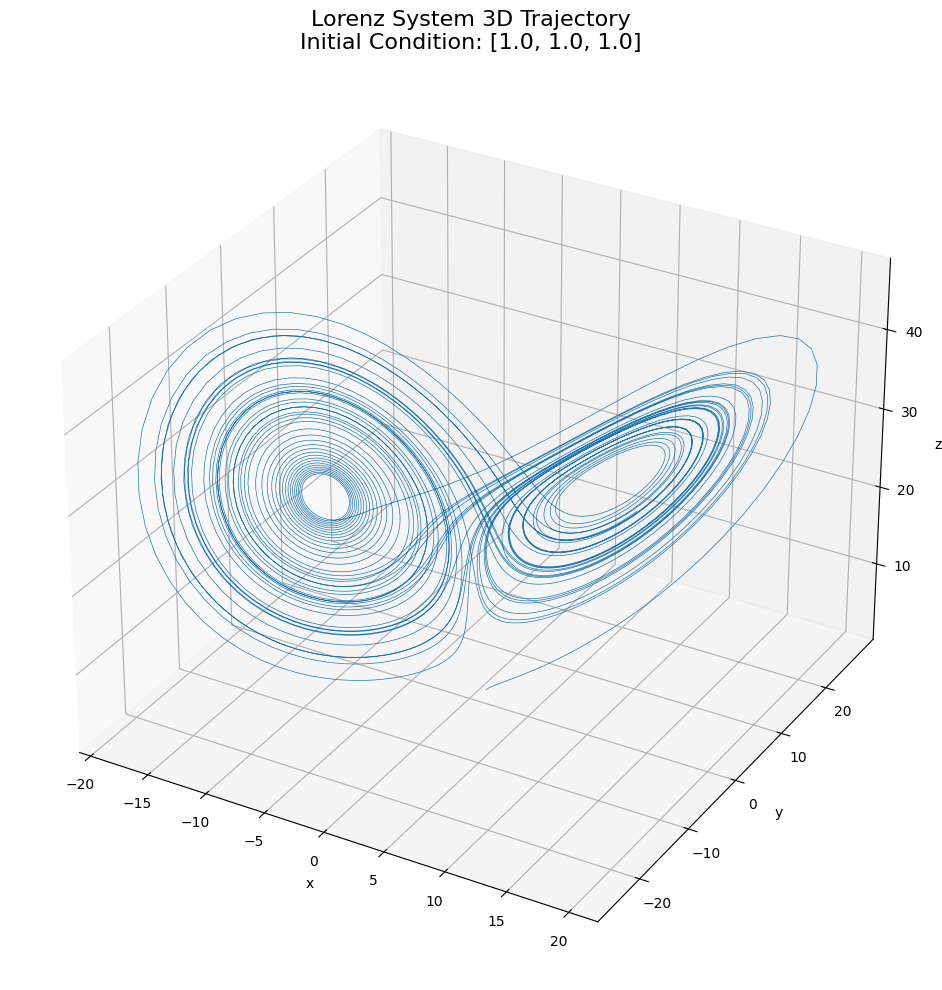

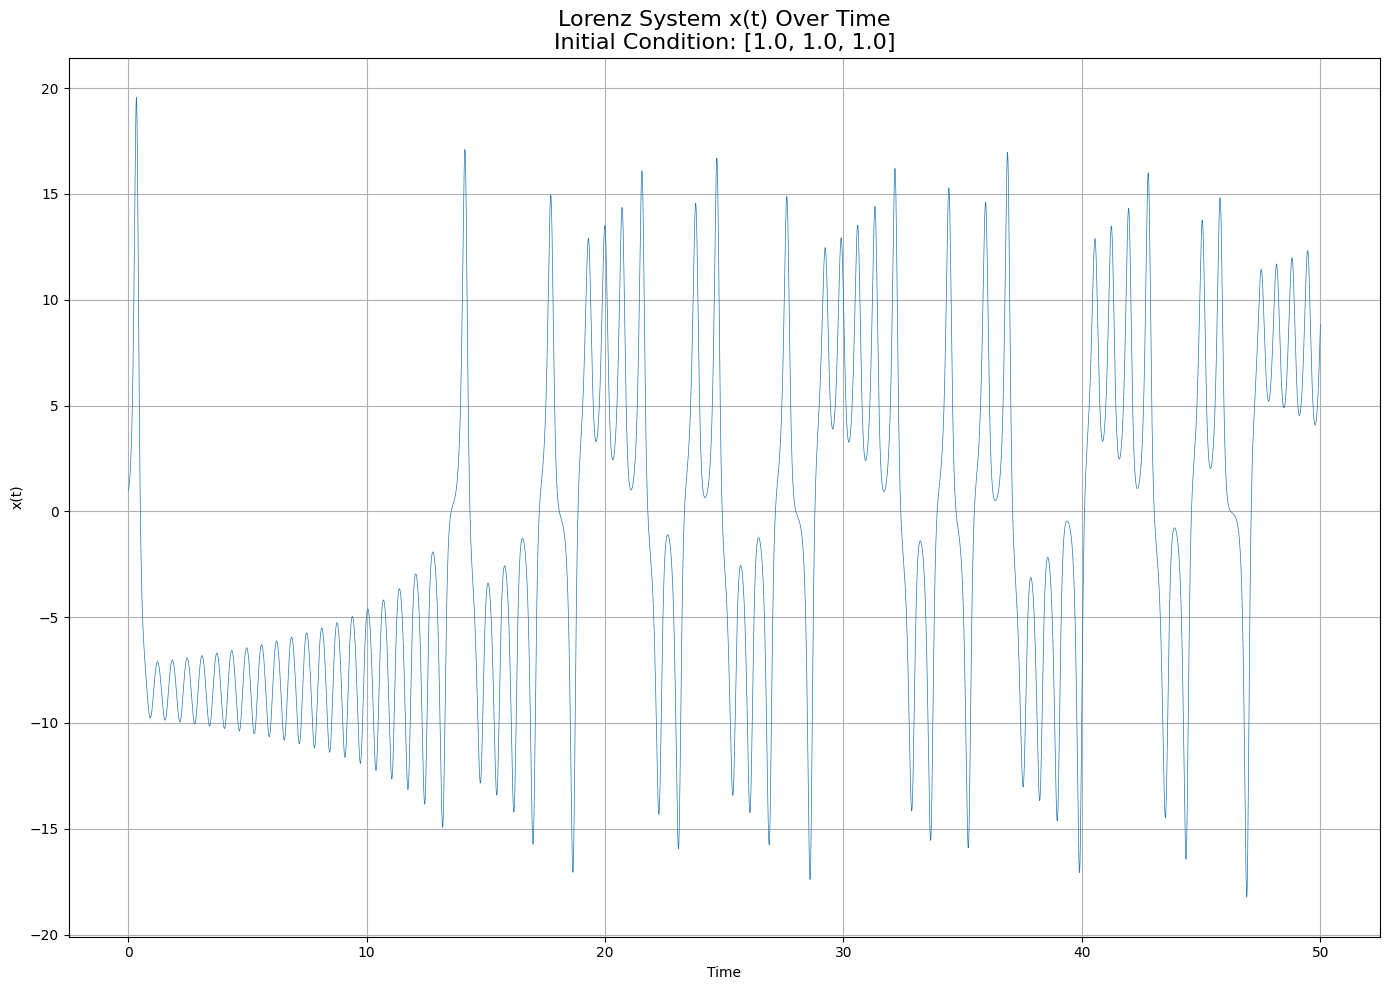

Simulating distinct trajectory 2 with initial condition: [1.01, 1.01, 1.01]


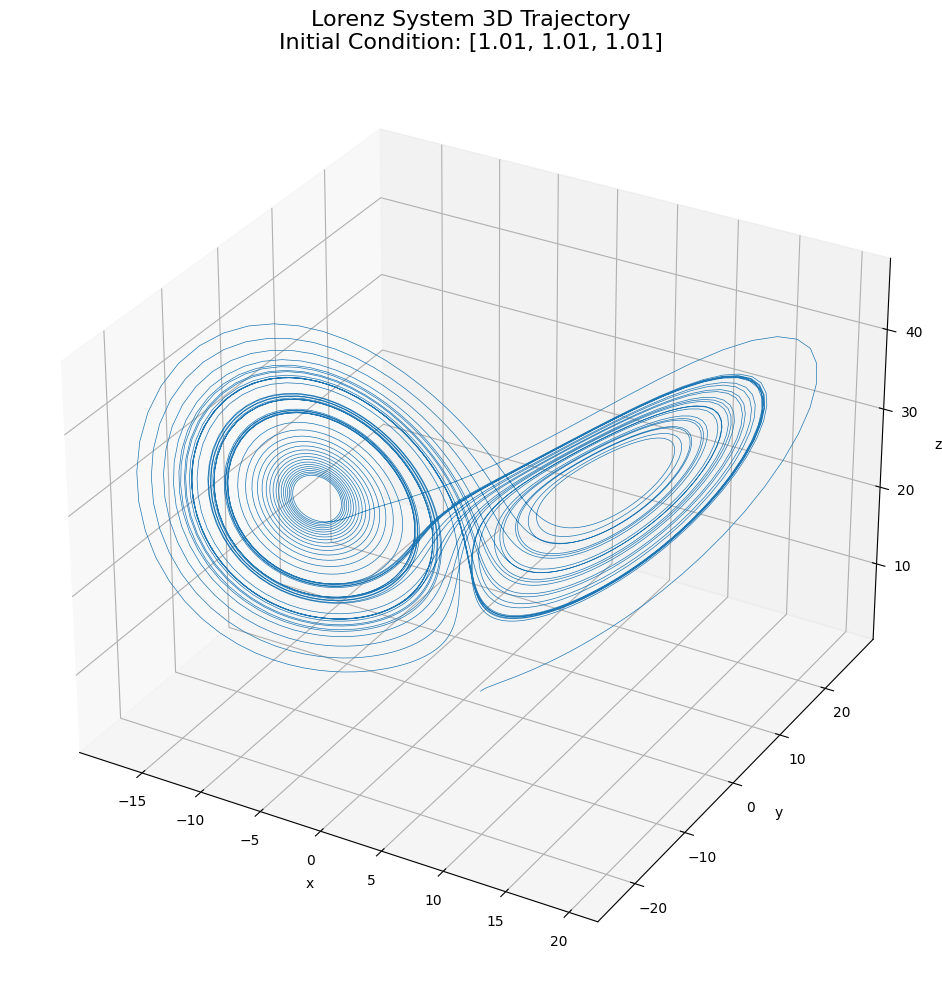

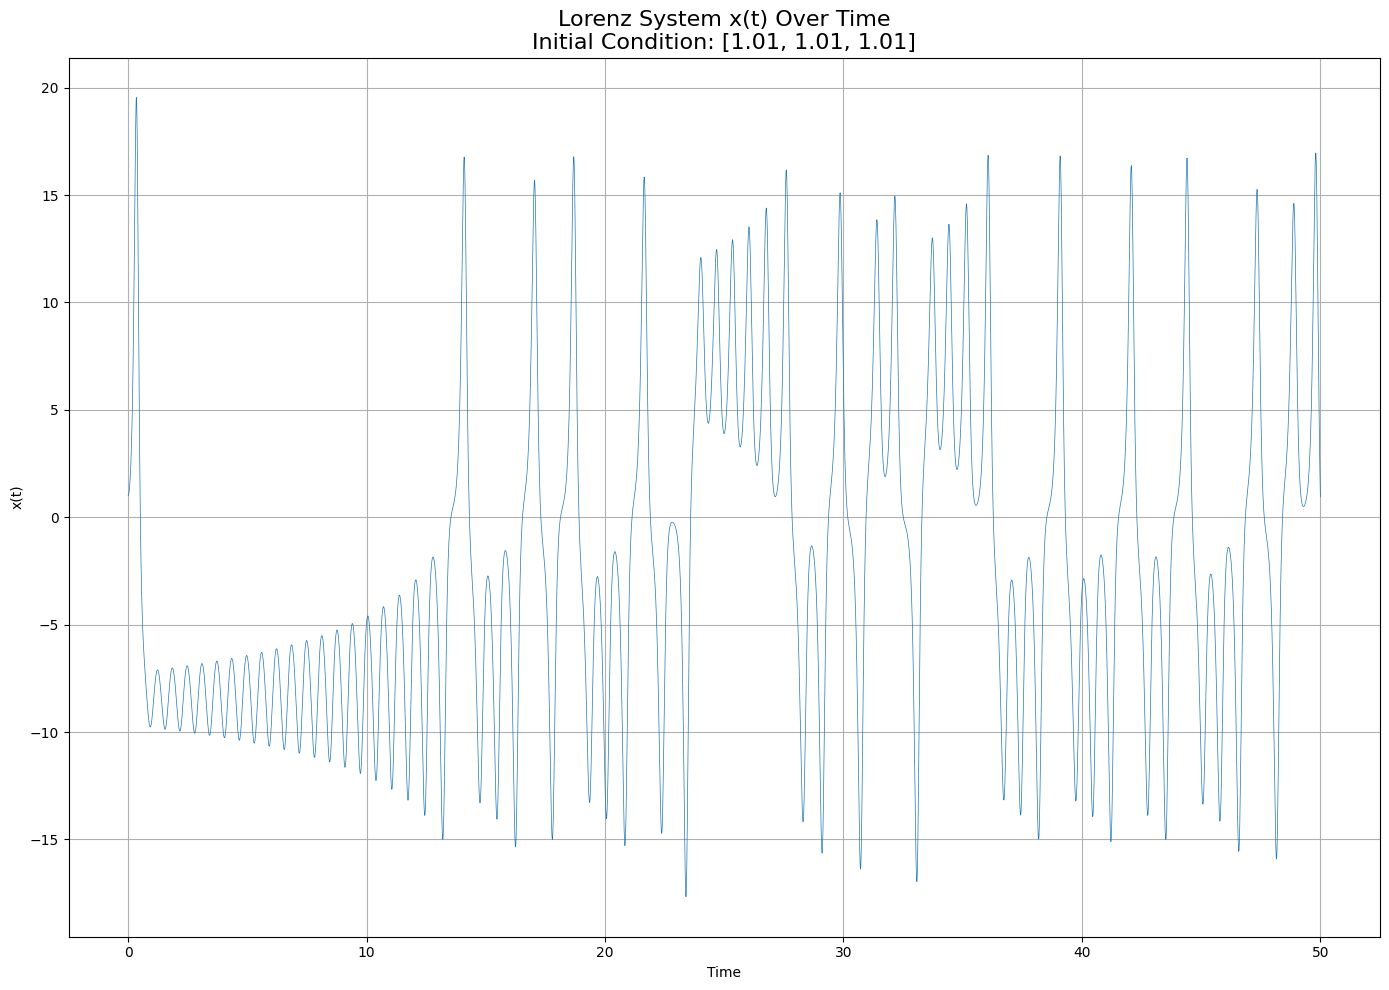

Simulating distinct trajectory 3 with initial condition: [10.0, 10.0, 10.0]


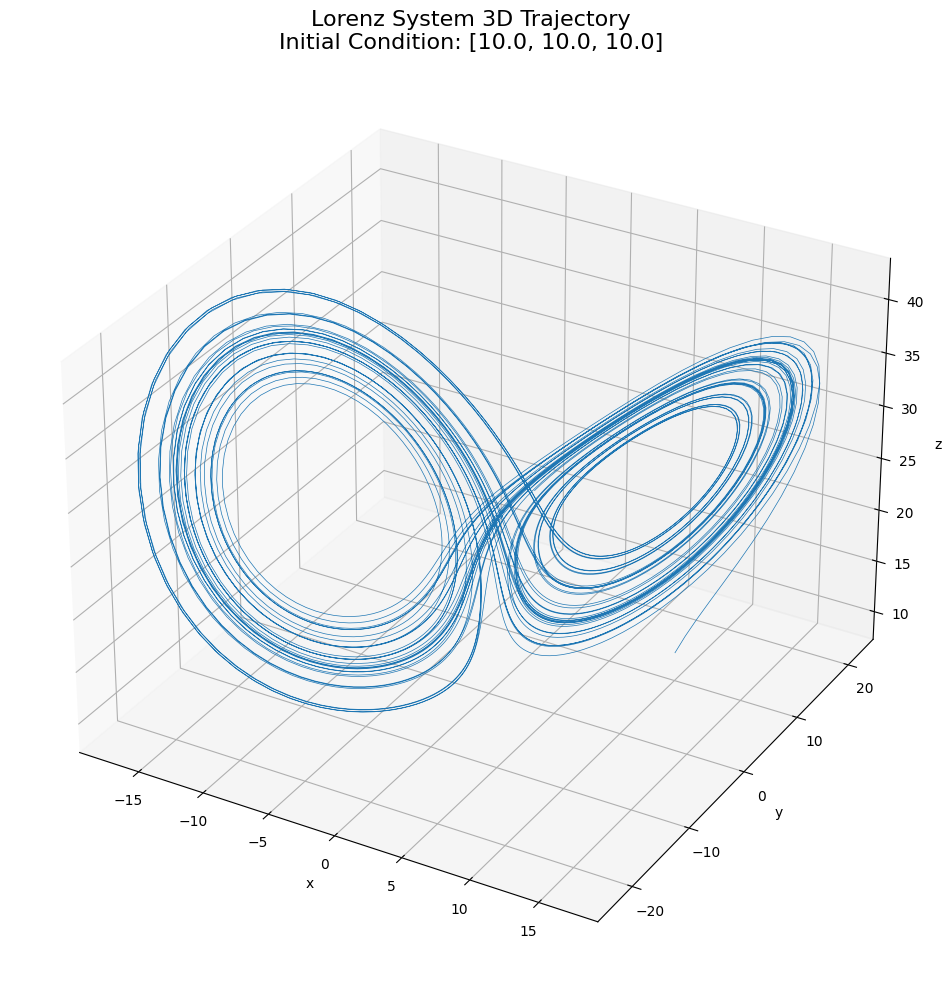

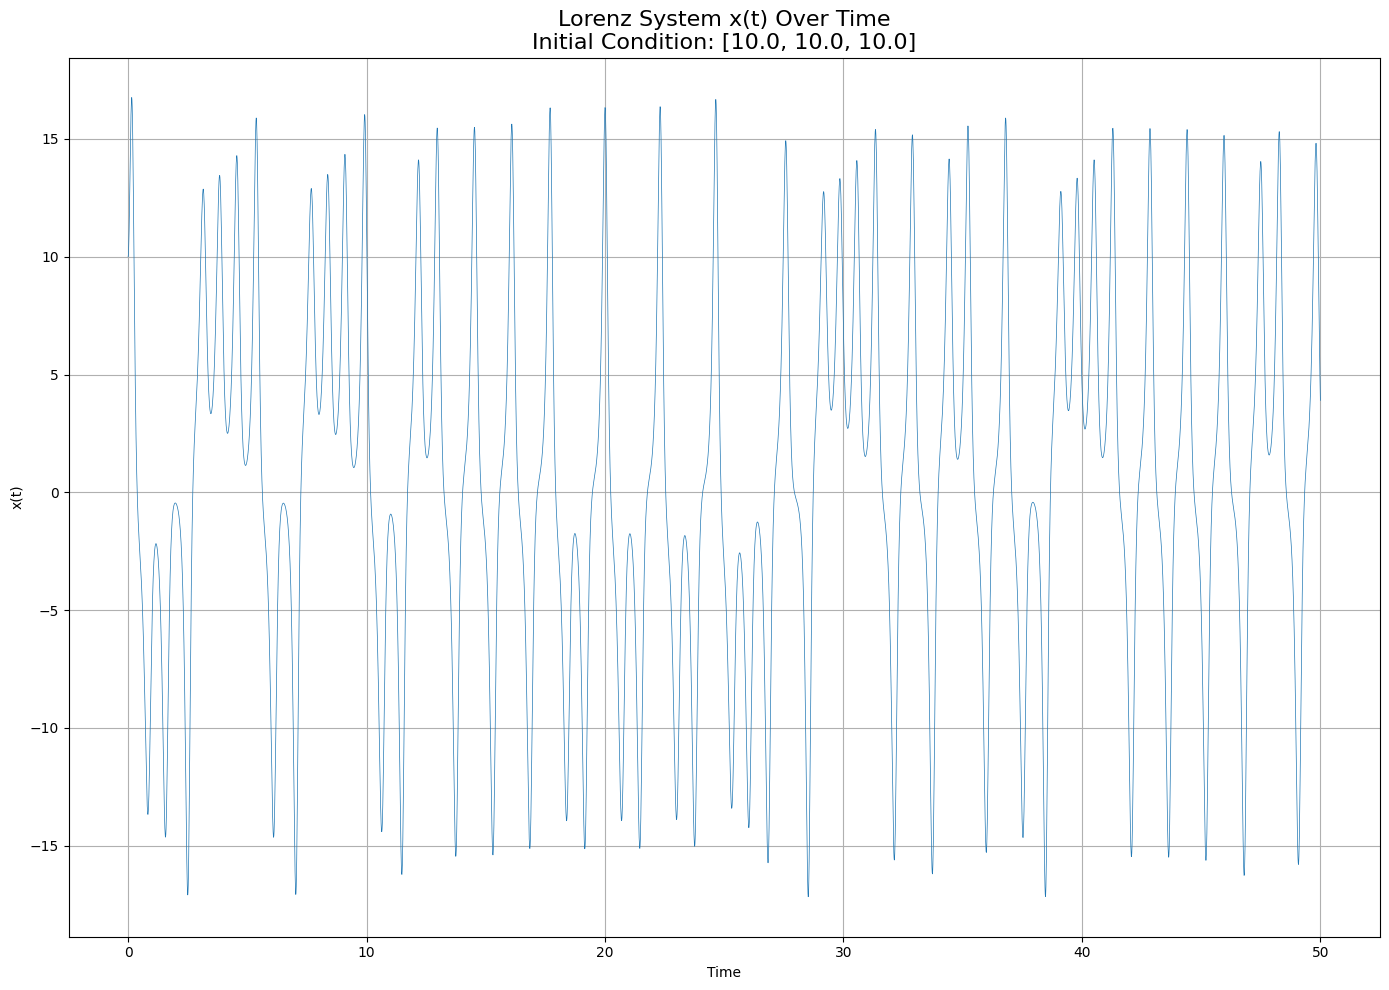

Simulating distinct trajectory 4 with initial condition: [100.0, 100.0, 100.0]


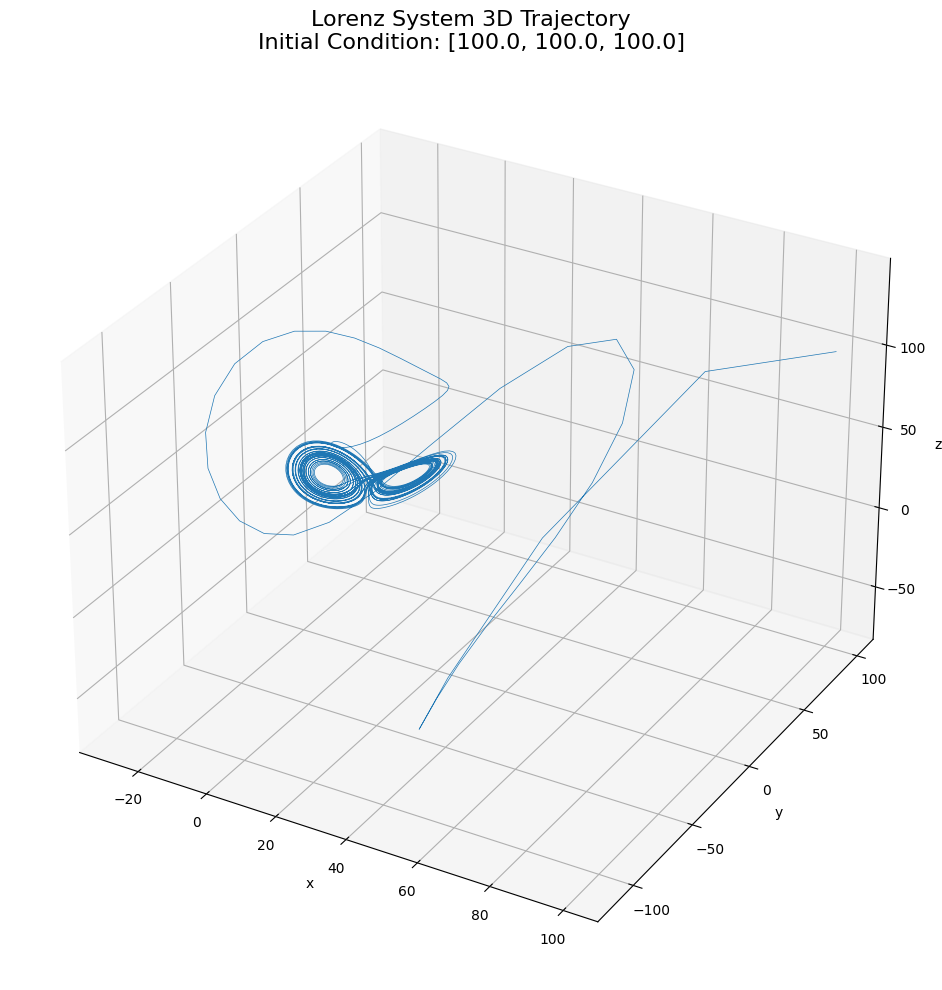

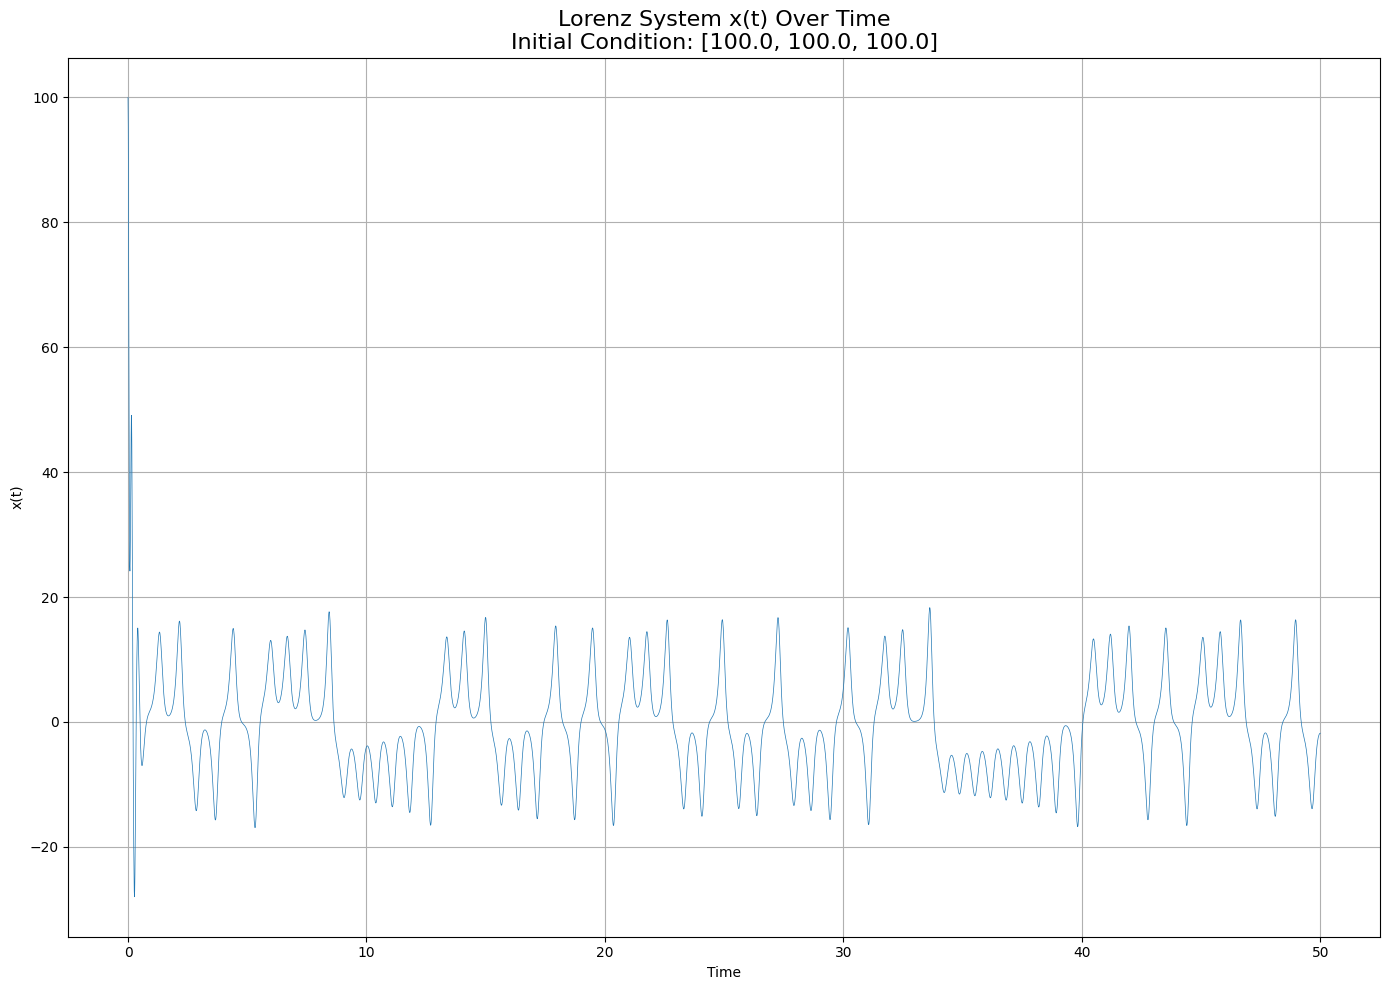

Simulating distinct trajectory 5 with initial condition: [1000.0, 1000.0, 1000.0]


/var/folders/hd/zbd8pxds5rb7s_5m29d5mvcm0000gn/T/ipykernel_67072/2813444786.py:12: RuntimeWarning: overflow encountered in scalar multiply
  dydt = x * (rho - z) - y
/var/folders/hd/zbd8pxds5rb7s_5m29d5mvcm0000gn/T/ipykernel_67072/2813444786.py:13: RuntimeWarning: overflow encountered in scalar multiply
  dzdt = x * y - beta * z
/var/folders/hd/zbd8pxds5rb7s_5m29d5mvcm0000gn/T/ipykernel_67072/2813444786.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  dzdt = x * y - beta * z
/var/folders/hd/zbd8pxds5rb7s_5m29d5mvcm0000gn/T/ipykernel_67072/2813444786.py:22: RuntimeWarning: invalid value encountered in add
  return state + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)


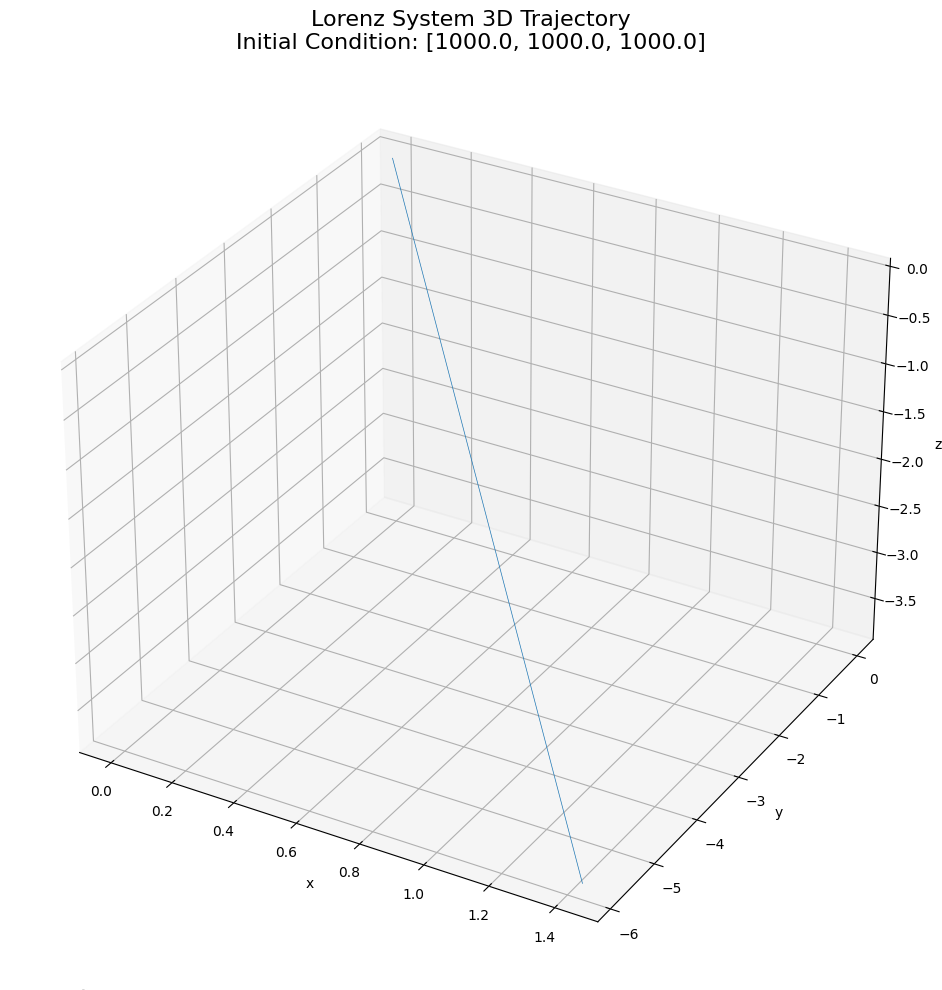

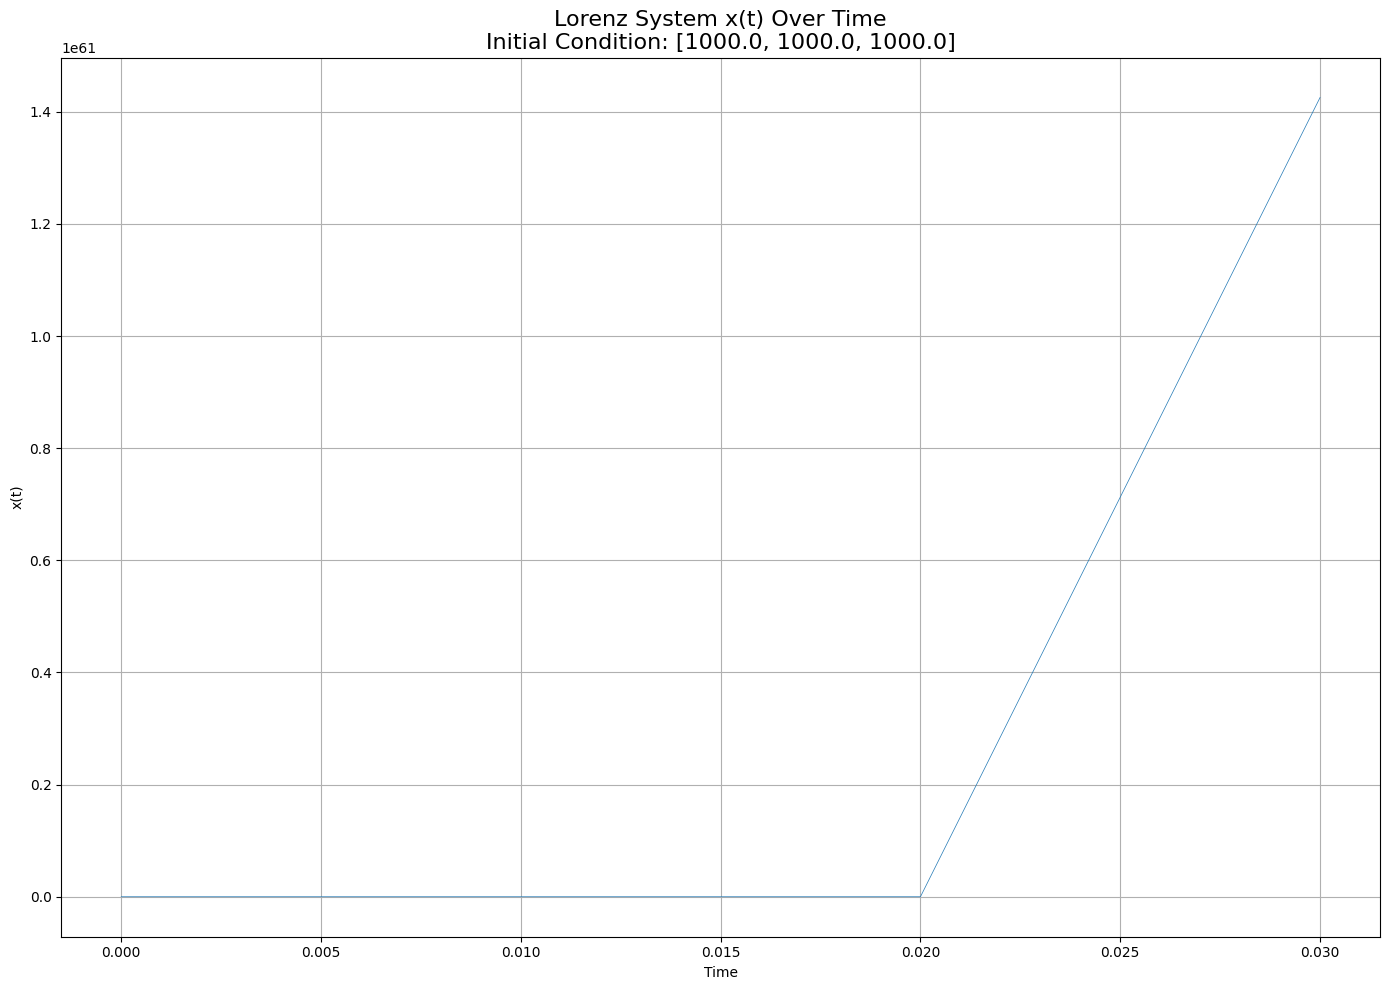


Simulating cloud of 5 trajectories near [1. 1. 1.]


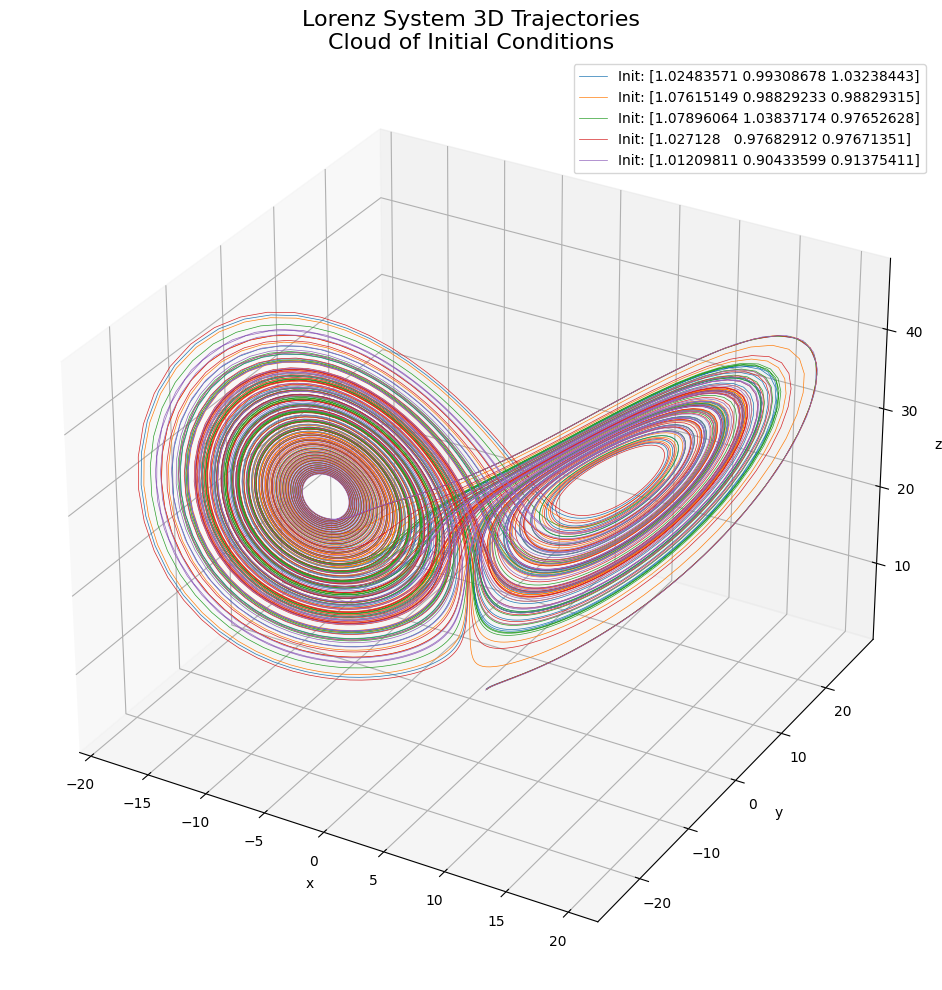

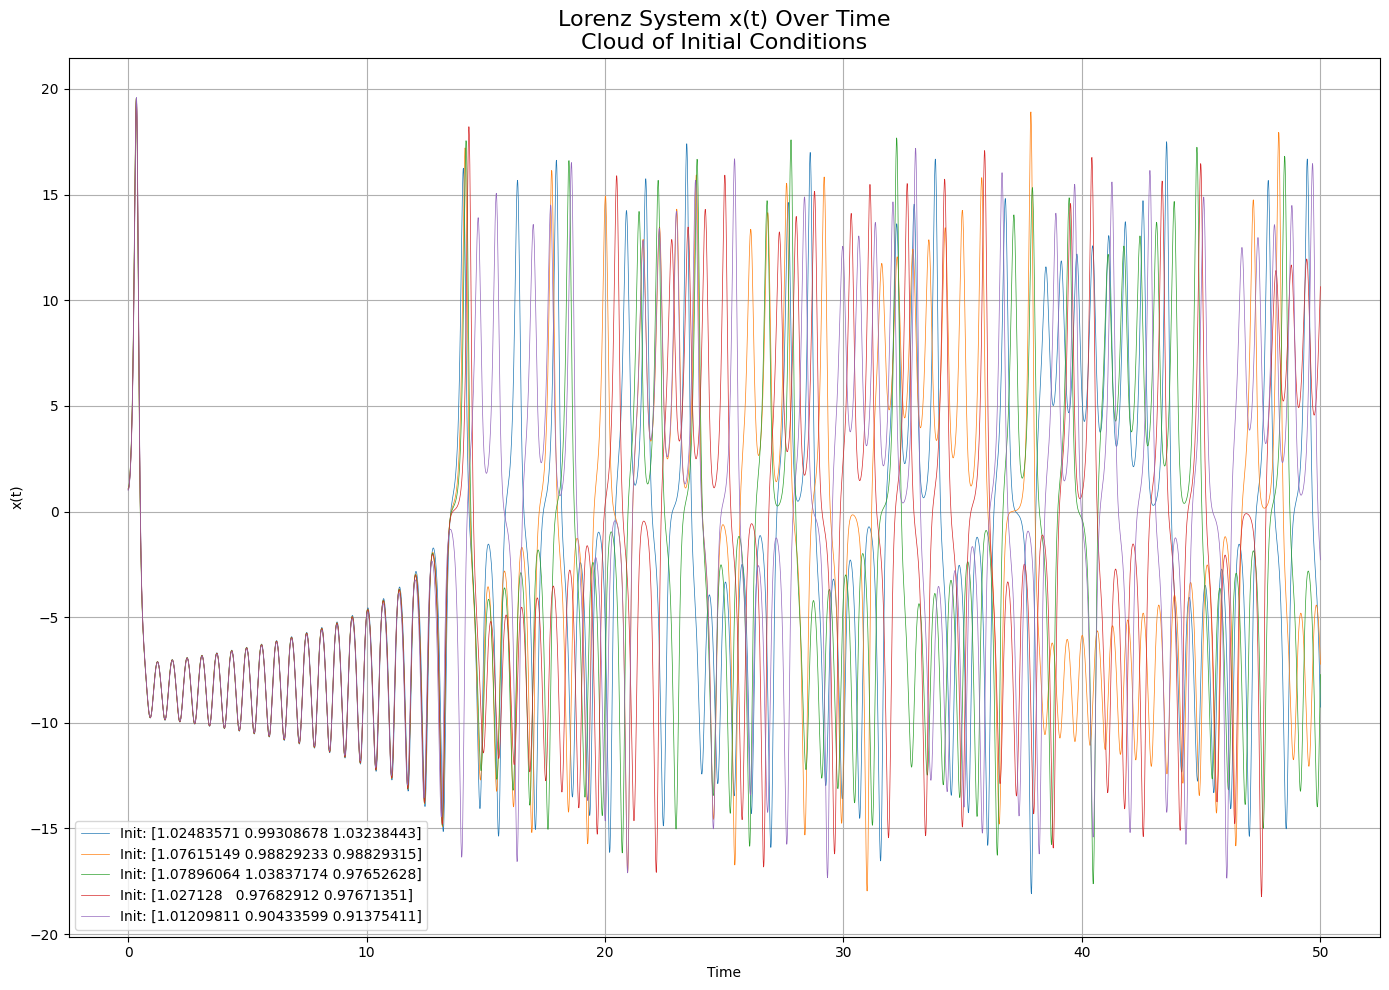

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set a random seed for reproducibility
np.random.seed(42)

# Define the Lorenz system
def lorenz_system(state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

# Implement the RK4 method
def rk4_step(func, state, sigma, rho, beta, dt):
    k1 = func(state, sigma, rho, beta)
    k2 = func(state + 0.5 * dt * k1, sigma, rho, beta)
    k3 = func(state + 0.5 * dt * k2, sigma, rho, beta)
    k4 = func(state + dt * k3, sigma, rho, beta)
    return state + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

# Simulate the Lorenz system
def simulate_lorenz(initial_state, sigma, rho, beta, t_max, dt):
    num_steps = int(t_max / dt) + 1
    trajectory = np.zeros((num_steps, 3))
    trajectory[0] = initial_state
    state = np.array(initial_state)
    
    for i in range(1, num_steps):
        state = rk4_step(lorenz_system, state, sigma, rho, beta, dt)
        trajectory[i] = state
    
    return trajectory

# Plotting functions
def plot_3d_trajectory(trajectory, initial_condition):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = trajectory[:, 0], trajectory[:, 1], trajectory[:, 2]
    ax.plot(x, y, z, lw=0.5)
    ax.set_title(f"Lorenz System 3D Trajectory\nInitial Condition: {initial_condition}", fontsize=16)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.tight_layout()
    plt.show()

def plot_x_over_time(trajectory, initial_condition, t_max, dt):
    fig, ax = plt.subplots(figsize=(14, 10))
    x = trajectory[:, 0]
    t = np.linspace(0, t_max, len(x))
    ax.plot(t, x, lw=0.5)
    ax.set_title(f"Lorenz System x(t) Over Time\nInitial Condition: {initial_condition}", fontsize=16)
    ax.set_xlabel("Time")
    ax.set_ylabel("x(t)")
    ax.grid(True)
    plt.tight_layout()
    plt.show()

def plot_cloud_3d_trajectories(trajectories, initial_conditions):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    for traj, init in zip(trajectories, initial_conditions):
        x, y, z = traj[:, 0], traj[:, 1], traj[:, 2]
        ax.plot(x, y, z, lw=0.5, label=f"Init: {init}")
    
    ax.set_title("Lorenz System 3D Trajectories\nCloud of Initial Conditions", fontsize=16)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.legend()
    plt.tight_layout()
    plt.show()

def plot_cloud_x_over_time(trajectories, initial_conditions, t_max, dt):
    fig, ax = plt.subplots(figsize=(14, 10))
    t = np.linspace(0, t_max, trajectories[0].shape[0])
    
    for traj, init in zip(trajectories, initial_conditions):
        x = traj[:, 0]
        ax.plot(t, x, lw=0.5, label=f"Init: {init}")
    
    ax.set_title("Lorenz System x(t) Over Time\nCloud of Initial Conditions", fontsize=16)
    ax.set_xlabel("Time")
    ax.set_ylabel("x(t)")
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

# Simulation parameters
sigma = 10
beta = 8 / 3
rho = 28

t_max = 50      # Total simulation time
dt = 0.01       # Time step size

# Define initial conditions
# 1. Distinct points
distinct_initial_conditions = [
    [1.0, 1.0, 1.0],           # Small values
    [1.01, 1.01, 1.01],        # Slightly perturbed
    [10.0, 10.0, 10.0],        # Moderate values
    [100.0, 100.0, 100.0],     # Larger values
    [1000.0, 1000.0, 1000.0]   # Very large values
]

# 2. Cloud of initial conditions near [1, 1, 1]
num_cloud_points = 5
cloud_center = np.array([1.0, 1.0, 1.0])
cloud_spread = 0.05
cloud_initial_conditions = [cloud_center + cloud_spread * np.random.randn(3) for _ in range(num_cloud_points)]

# Simulate and plot for distinct initial conditions
for idx, initial in enumerate(distinct_initial_conditions, 1):
    print(f"Simulating distinct trajectory {idx} with initial condition: {initial}")
    traj = simulate_lorenz(initial, sigma, rho, beta, t_max, dt)
    
    # Plot 3D Trajectory
    plot_3d_trajectory(traj, initial)
    
    # Plot x(t) Over Time
    plot_x_over_time(traj, initial, t_max, dt)

# Simulate cloud trajectories
print(f"\nSimulating cloud of {num_cloud_points} trajectories near {cloud_center}")
cloud_trajectories = []
for idx, initial in enumerate(cloud_initial_conditions, 1):
    traj = simulate_lorenz(initial, sigma, rho, beta, t_max, dt)
    cloud_trajectories.append(traj)

# Plot cloud 3D trajectories
plot_cloud_3d_trajectories(cloud_trajectories, cloud_initial_conditions)

# Plot cloud x(t) over time
plot_cloud_x_over_time(cloud_trajectories, cloud_initial_conditions, t_max, dt)

## Analysis of the Results
Below is an analysis of the key findings from the Lorenz system simulations:

---

#### **General Observations**
1. **Lorenz Attractor Dynamics**:
   - The trajectories of the Lorenz system display the characteristic butterfly shape, indicative of chaotic behavior. The system exhibits extreme sensitivity to initial conditions, as seen in the divergence of trajectories for slightly different initial states.

2. **Temporal Behavior**:
   - The $x(t)$ plots reveal oscillatory patterns with varying amplitudes and frequencies. These oscillations are non-periodic, further emphasizing the chaotic nature of the system.

---

#### **Specific Initial Condition Analysis**
1. **Initial Condition: [1.0, 1.0, 1.0]**:
   - **Trajectory**:
     - The trajectory remains confined within the attractor's structure, showing typical Lorenz dynamics with no transient divergence.
   - **Temporal Behavior**:
     - The $x(t)$ plot shows sustained oscillations that do not settle into a fixed period or amplitude, confirming the chaotic nature.

2. **Initial Condition: [1.01, 1.01, 1.01]**:
   - **Trajectory**:
     - Despite the initial conditions being very close to [1.0, 1.0, 1.0], the trajectory diverges visibly over time, demonstrating sensitivity to initial conditions—a hallmark of chaotic systems.
   - **Temporal Behavior**:
     - The $x(t)$ plot retains the oscillatory and chaotic pattern but with deviations from the trajectory of the first initial condition.

3. **Initial Condition: [10.0, 10.0, 10.0]**:
   - **Trajectory**:
     - The trajectory initially shows a larger divergence before settling into the attractor's bounds, indicating transient instability.
   - **Temporal Behavior**:
     - The $x(t)$ plot demonstrates larger initial oscillations before converging to a chaotic regime similar to other initial conditions.

4. **Initial Condition: [100.0, 100.0, 100.0]**:
   - **Trajectory**:
     - A significant initial transient divergence is observed as the system takes time to converge into the attractor. This is likely due to the larger deviation from the attractor's typical bounds.
   - **Temporal Behavior**:
     - The $x(t)$ plot shows a pronounced initial peak before chaotic oscillations dominate.


5. **Initial Condition: [1000, 1000, 1000]**:
   - **Trajectory**:
     - The system fails to settle into the typical butterfly-shaped Lorenz attractor, showing instead a dramatic divergence. This suggests that the initial conditions are far outside the system's stable regime.
     - This trajectory demonstrates how large initial values can push the system outside the attractor's bounded dynamics, causing the state variables to grow exponentially.
   - **Temporal Behavior**:
     - The $x(t)$ plot shows an exponential increase, deviating from the typical oscillatory patterns observed in smaller initial conditions. This behavior is likely due to the amplifying effects of the Lorenz equations' nonlinear terms.
   - **Conclusion**:
     - This case highlights the importance of the system's bounded chaotic region. Large initial values lead to trajectories that fail to converge to the attractor, instead spiraling outward indefinitely.

6. **Cloud of Initial Conditions**:
   - **Trajectory**:
     - The trajectories for the cloud of initial conditions begin closely clustered, reflecting their proximity in the initial state space. Over time, these trajectories separate and trace the butterfly-shaped attractor independently.
     - The attractor's structure ensures that all trajectories eventually fall within its bounds, despite their initial divergence.
   - **Temporal Behavior**:
     - The $x(t)$ plots illustrate the divergence in oscillatory behavior across the different initial conditions. While initially synchronized, the trajectories become desynchronized as the chaotic dynamics amplify small differences in the starting points.
   - **Conclusion**:
     - The cloud of initial conditions exemplifies the Lorenz system's sensitivity to initial conditions. Despite starting near each other, the trajectories quickly diverge, following distinct chaotic paths within the attractor.

---

#### **Concluding Observations**
1. **Behavior Across Initial Conditions**:
   - Small to moderate initial conditions ([1, 1, 1] to [100, 100, 100]) result in trajectories that stabilize into the Lorenz attractor, showcasing bounded chaotic dynamics.
   - Large initial conditions ([1000, 1000, 1000]) break this pattern, leading to unbounded trajectories and highlighting the system's instability outside the attractor's bounds.

2. **Sensitivity to Initial Conditions**:
   - The analysis of the cloud of initial conditions underscores the unpredictable nature of chaotic systems. Minute differences in the initial state lead to entirely distinct long-term behaviors.

3. **Numerical and Physical Considerations**:
   - The exponential divergence for large initial conditions suggests potential challenges in simulating systems with extreme values, necessitating careful consideration of numerical methods and parameter ranges.